In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils as utils
import torchvision
import numpy as np
from bayesian_torch.layers import LinearReparameterization

In [29]:
from datasets import CursorHandle

In [59]:
cur = CursorHandle(({"u": 1, "r": 2, "i": 4} for _ in range(256)), 256, {"users": lambda x: x["u"], "items": lambda x: x["i"], "rating": lambda x: x["r"]})

In [61]:
for c in cur:
    print(c)
    if c.idx > 10:
        break

cursor 0x7f58caeeba00 current entry #0: <users:None>, <items:None>, <rating:None>
cursor 0x7f58caeeba00 current entry #1: <users:None>, <items:None>, <rating:None>
cursor 0x7f58caeeba00 current entry #2: <users:None>, <items:None>, <rating:None>
cursor 0x7f58caeeba00 current entry #3: <users:None>, <items:None>, <rating:None>
cursor 0x7f58caeeba00 current entry #4: <users:None>, <items:None>, <rating:None>
cursor 0x7f58caeeba00 current entry #5: <users:None>, <items:None>, <rating:None>
cursor 0x7f58caeeba00 current entry #6: <users:None>, <items:None>, <rating:None>
cursor 0x7f58caeeba00 current entry #7: <users:None>, <items:None>, <rating:None>
cursor 0x7f58caeeba00 current entry #8: <users:None>, <items:None>, <rating:None>
cursor 0x7f58caeeba00 current entry #9: <users:None>, <items:None>, <rating:None>
cursor 0x7f58caeeba00 current entry #10: <users:None>, <items:None>, <rating:None>
cursor 0x7f58caeeba00 current entry #11: <users:None>, <items:None>, <rating:None>


In [13]:
cur2 = CursorHandle(list(range(256)), 256, {"q": lambda x: x*x})
c

Entry 0 (fields: <users>, <items>, <rating>)

In [4]:
c._current

{'u': 1, 'r': 2, 'i': 4}

In [3]:
from datasets import Movielens1MDataset
ds = Movielens1MDataset(rescale=False)

/home/vg/synthetic/datasets.py:105: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv(path, sep=sep)


[('users', 6040),
 ('items', 3706),
 ('sparsity', 0.9553164190519758),
 ('mean rating', 0.16003706178990218),
 ('user avg rating count', 165.5973509933775),
 ('item avg rating count', 269.88882892606586),
 ('rating', <Figure size 432x288 with 1 Axes>),
 ('user rating distribution', <Figure size 432x288 with 1 Axes>),
 ('item rating distribution', <Figure size 432x288 with 1 Axes>)]

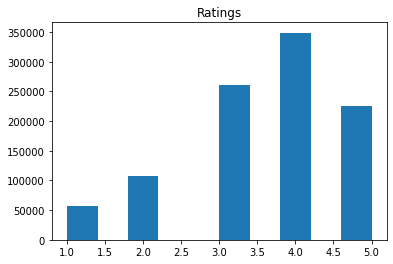

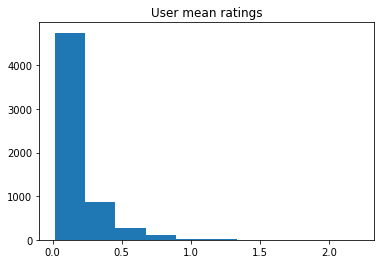

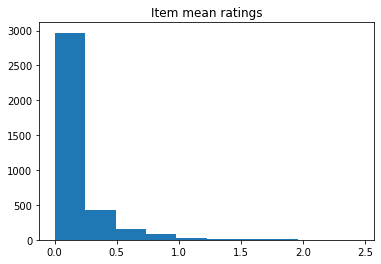

In [4]:
ds.print_stats()

In [5]:
for row in ds.as_iterator():
    print(row)
    break

(0, 0, 3.0)


In [6]:
from bayesian_torch.layers import LinearReparameterization

In [7]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), args.learning_rate)

output = model(x_train)
kl = get_kl_loss(model)
ce_loss = criterion(output, y_train)
loss = ce_loss + kl / args.batch_size 

loss.backward()
optimizer.step()


NameError: name 'model' is not defined

In [9]:
class Laplace:
    def __init__(self, loc, spread):
        if loc.shape != spread.shape:
            raise Exception(loc.shape, spread.shape)
        self.loc, self.spread = loc, spread
    
    def cdf(self, x=None):
        shifted = (x - self.loc) / self.spread
        result = .5 * torch.exp(shifted)
        result[shifted >= .0] = (1.0 - .5 * torch.exp(-shifted))[shifted >= .0]
        return result

In [10]:
LATENT_EMBEDDING_SIZE = 3
RATING_HIDDEN_SIZE = 4

RATING_LEVELS = 5
rating_ranges = [(-torch.inf, -1.5), (-1.5, -0.5), (-0.5, 0.5), (0.5, 1.5), (1.5, +torch.inf)]
BATCH_SIZE = 256

In [11]:
item_lat = nn.Embedding(ds.n_items, LATENT_EMBEDDING_SIZE)
hidden_user_lat = nn.Embedding(ds.n_users, LATENT_EMBEDDING_SIZE * RATING_HIDDEN_SIZE)

hidden_to_rating_loc = nn.Linear(RATING_HIDDEN_SIZE, 1)
hidden_to_rating_spread = nn.Linear(RATING_HIDDEN_SIZE, 1)

def user_item_interaction(iidx, uidx):
    item_emb = item_lat(iidx).reshape(iidx.shape[0], 1, LATENT_EMBEDDING_SIZE)
    user_emb = hidden_user_lat(uidx).reshape((iidx.shape[0], LATENT_EMBEDDING_SIZE, RATING_HIDDEN_SIZE))
    return torch.matmul(item_emb, user_emb)

def rating_loc_spread(interaction, eta=0.05):
    loc = hidden_to_rating_loc(interaction)[:, :, 0]
    spread = eta + torch.exp(hidden_to_rating_spread(interaction))[:, :, 0]
    return loc, spread

In [12]:
r = torch.tensor(b["r"][:, np.newaxis])
r.shape

NameError: name 'b' is not defined

In [14]:
iidx = torch.tensor(b["i"])
uidx = torch.tensor(b["u"])

inter = user_item_interaction(iidx, uidx)
loc, spread = rating_loc_spread(inter)

NameError: name 'b' is not defined

In [5]:
def ratings_batches(ds, batch_size: int = 256):
    data = np.vstack(ds.rating_matrix.nonzero())
    indices = list(range(ds.n_ratings))
    np.random.shuffle(indices)
    data = data[:, indices]
    batches = np.array_split(data, ds.n_ratings // batch_size + 1, axis=1)
    for batch in batches:
        yield {"u": batch[0], "i": batch[1], "r": np.array(
            ds.rating_matrix[batch[0], batch[1]]
        )[0, :]}

In [16]:
rating_distro = Laplace(loc, spread)
probas = rating_distro.cdf(r + 0.5) - rating_distro.cdf(r - 0.5)
inter.shape, probas

NameError: name 'loc' is not defined

In [6]:
batches = ratings_batches(ds)

In [28]:
1+1

2

ERROR! Session/line number was not unique in database. History logging moved to new session 85


In [30]:
5+3+3

11

In [32]:
i = cur.__iter__()

ERROR! Session/line number was not unique in database. History logging moved to new session 91


In [ ]:
next(i)

In [ ]:
i

ERROR! Session/line number was not unique in database. History logging moved to new session 92
